![Astrofisica Computacional](../logo.PNG)

---
## 49. Animación de gráficos de densidad.

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Resumen

En este cuaderno se ilustrará como animar gráficos 2-dimensionales de densidad.

---

## Un perfil Gaussiano como gráfico de densidad

En este código se crea un perfil Gaussiano 2-dimensional y se general un gráfico de densidad a partir de él.

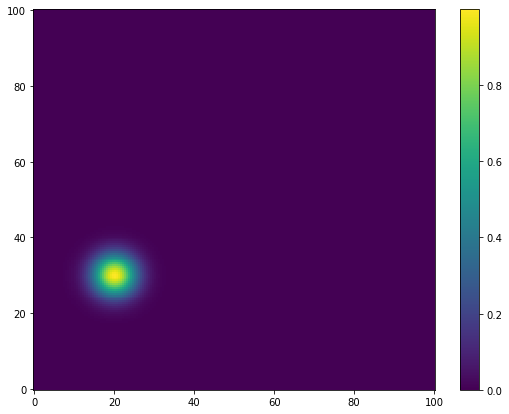

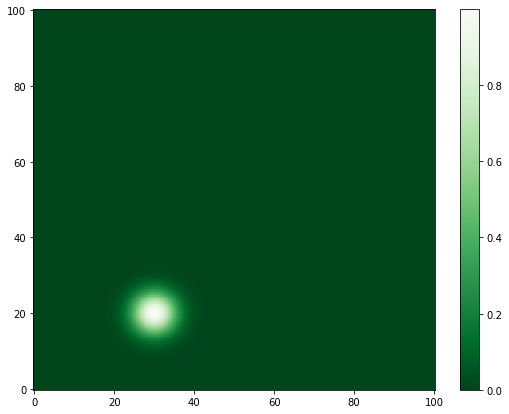

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
 
# 2D-Gaussian Profile
def gaussian(x,y, x0=30., y0=30.):
    sigma2 = 15.
    return np.exp(-((x-x0)**2 + (y-y0)**2)/(2*sigma2))


# Initial data for the Gaussian profile
x0 = 20.
y0 = 30.



# 2-D grid
n = 200
xrange = np.linspace(0,100,n)
yrange = np.linspace(0,100,n)
zrange = np.zeros([n,n])

# Build the profile
for i in range(n):
    zrange[i,:] = gaussian(xrange[i], yrange, x0, y0) 


# Make the plot with colorbar
plt.figure(figsize=(9,7))
plt.pcolormesh(xrange, yrange, zrange.T, shading='auto')
# Note the transposition of the zrange array included to obtain 
# the x component in the horizontal axis
plt.colorbar()
plt.show()
 
# Change color palette
plt.figure(figsize=(9,7))
plt.pcolormesh(xrange, yrange, zrange, shading='auto', cmap=plt.cm.Greens_r)
plt.colorbar()
plt.show()


Nota: La funcion [maptplotlib.pyplot.pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) requiere que la malla x-y defina las esquinas de los cuadrilateros que se llenan con el color dado por z cuando se deja el argumento por defecto `shading='flat'`. Por esta razón, la matriz `zrange` debe tener una fila y una columna menos que lo que tiene la malla x-y o se debe cambiar el argumento `shading`. En este caso se utiliza `shading='auto'`.

### Animación

Para visualizar el movimiento del perfil se utilizará la función [matplotlib.animation.ArtistAnimation](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.ArtistAnimation.html). 

Para utilizar esta función, primero se crea una lista llamada `ims` en la cual se guardan las imagenes que van a combinarse en la animación. Luego, la función `ArtistAnimation` tomará estas imagenes y las combina en una animación en la cual cada frame durará 50ms.



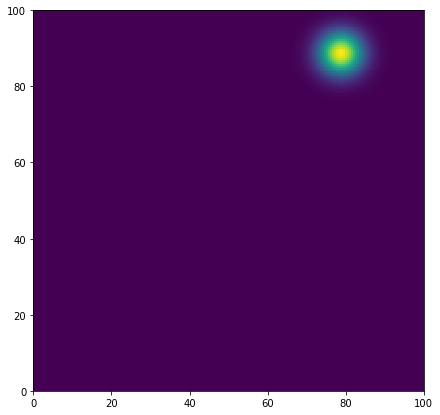

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline
 
# 2D-Gaussian Profile
def gaussian(x,y, x0=30., y0=30.):
    sigma2 = 15.
    return np.exp(-((x-x0)**2 + (y-y0)**2)/(2*sigma2))


# Initial data for the profile
x0 = 20.
y0 = 30.

# 2-D grid
n = 200
xrange = np.linspace(0,100,n)
yrange = np.linspace(0,100,n)
zrange = np.zeros([n,n])


# Animation
fig = plt.figure(figsize=(7,7))
ims = []

for t in range(60):
    # Build the profile
    for i in range(n):
        zrange[i,:] = gaussian(xrange[i], yrange, x0, y0) 
    x0 += 1.
    y0 += 1.
    
    im = plt.pcolormesh(xrange, yrange, zrange[1:,1:].T, shading='auto')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)


HTML(ani.to_jshtml())


Nota: La funcion [maptplotlib.pyplot.pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) requiere que la malla x-y defina las esquinas de los cuadrilateros que se llenan con el color dado por z cuando se deja el argumento por defecto `shading='flat'`. Por esta razón, la matriz `zrange` debe tener una fila y una columna menos que lo que tiene la malla x-y y por ello el argumento que se utiliza es zrange[1:,1:] (es decir, eliminamos la primera fila y la primera columna del arreglo)